<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/09_SupportVectorMachine_Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1 . Load data

In [124]:
! git clone https://github.com/trongthuan205/DS102.K21 DS102.K21

fatal: destination path 'DS102.K21' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('DS102.K21/Social_Network_Ads.csv')

In [0]:
X = data.iloc[:,[2,3]].values

In [0]:
y = data.iloc[:,4].values

# 3 . Normalize data

In [0]:
SC = StandardScaler()

In [0]:
X = SC.fit_transform(X)

# 3 . Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# 4 . Build and Train model

In [0]:
model = SVC(kernel = 'linear', random_state = 0)

In [132]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# 5 . Visualize

In [0]:
def VisualizingDataset(X_, y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(y_)):
        plt.scatter(X1[y_ == label], X2[y_ == label], color = ListedColormap(('red', 'green'))(i))
        plt.legend(np.unique(y_))

In [0]:
def VisualizingResult(model, X_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    X1_range = np.arange(X1.min()-1, X1.max()+1, 0.01)
    X2_range = np.arange(X2.min()-1, X2.max()+1, 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid = np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    y_grid = model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, y_grid, alpha = 0.5, cmap = ListedColormap(('red','green')))

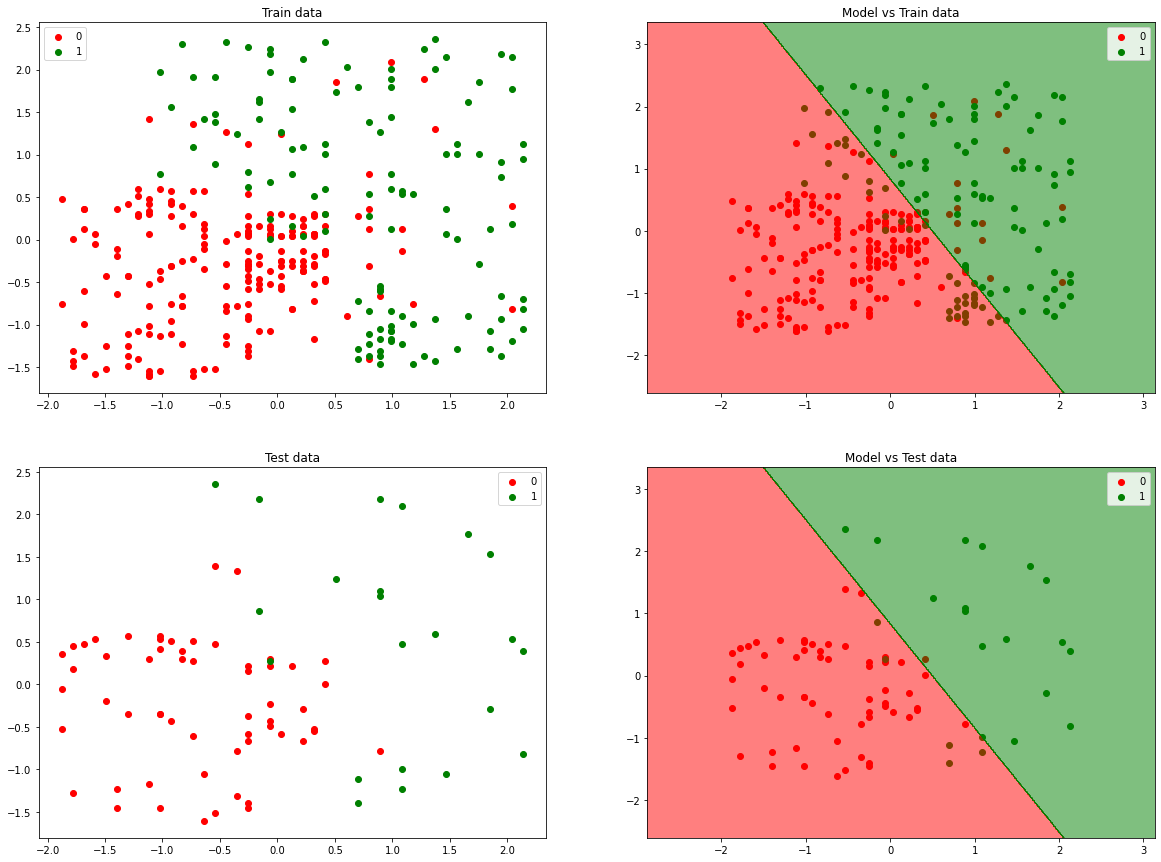

In [135]:
plt.figure(figsize = (20,15))
plt.subplot(2,2,1)
VisualizingDataset(X_train, y_train)
plt.title('Train data')
plt.subplot(2,2,2)
VisualizingDataset(X_train, y_train)
VisualizingResult(model, X_train)
plt.title('Model vs Train data')
plt.subplot(2,2,3)
VisualizingDataset(X_test, y_test)
plt.title('Test data')
plt.subplot(2,2,4)
VisualizingDataset(X_test, y_test)
VisualizingResult(model, X_test)
plt.title('Model vs Test data')
plt.savefig('SVM.png')

# 6 . Evaluate model

In [136]:
y_pred_train = model.predict(X_train)
y_pred_train.shape

(320,)

In [137]:
y_pred_test = model.predict(X_test)
y_pred_test.shape

(80,)

Accuray score in train:  0.821875
Confusion matrix in Train data: 
 [[181  18]
 [ 39  82]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

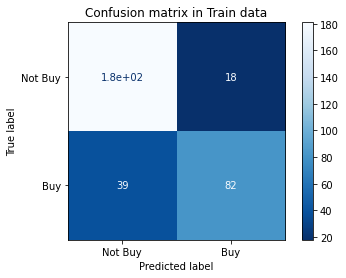

In [138]:
cm_train = confusion_matrix(y_train, y_pred_train)
print('Accuray score in train: ', model.score(X_train, y_train))
print('Confusion matrix in Train data: \n', cm_train)
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues_r', display_labels = ('Not Buy', 'Buy'))
plt.title('Confusion matrix in Train data')

Accuracy score in test:  0.9125
Confusion matrix in Test data: 
 [[57  1]
 [ 6 16]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

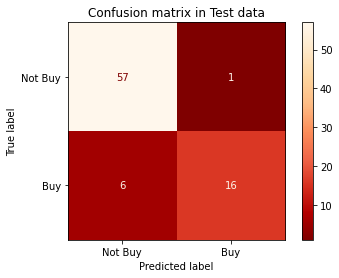

In [139]:
cm_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score in test: ', model.score(X_test, y_test))
print('Confusion matrix in Test data: \n', cm_test)
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd_r', display_labels = ('Not Buy', 'Buy'))
plt.title('Confusion matrix in Test data')

# 6 . Compare

In [0]:
def compare(i_example):
    X = X_test[i_example:i_example + 1]
    y = y_test[i_example]
    y_pred = model.predict(X)
    X_inv = SC.inverse_transform(X)
    print(X_inv,3, y, y_pred)

In [146]:
X[7:12]

array([[-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597]])